
### HEART ATTACK PREDICTION USING MACHINE LEARNING ALGORITHMS

Dataset:
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [ ]:
# Retrieving dataset
! wget https://firebasestorage.googleapis.com/v0/b/t20med-oficial.appspot.com/o/TCC%2Fheart.csv?alt=media&token=60ef1036-887c-4f22-b6b2-150a91f96c87
! ls
! mv 'TCC%2Fheart.csv?alt=media' dados.csv

# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


--2022-06-27 19:55:10--  https://firebasestorage.googleapis.com/v0/b/t20med-oficial.appspot.com/o/TCC%2Fheart.csv?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 142.251.120.95, 2607:f8b0:4001:c06::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|142.251.120.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [application/vnd.ms-excel]
Saving to: ‘TCC%2Fheart.csv?alt=media’

TCC%2Fheart.csv?alt 100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-06-27 19:55:11 (49.9 MB/s) - ‘TCC%2Fheart.csv?alt=media’ saved [11323/11323]

 sample_data  'TCC%2Fheart.csv?alt=media'



# First analysis

Explaining the features

- age: Age(int)
- sex: 0 for female e 1 for male
- exang: exercise-induced angina (1 - yes, 0 - no)
- ca: number of major blood vessels colored in fluoroscopy (0 - 3)
- cp: type of chest pain
 - 1: typical angina
 - 2: atypical angina 
 - 3: pain not angina
 - 4: no symptoms
- trtbps: blood pressure in rest (mmHg)
- chol: cholesterol (mg/dl)
- fbs: Fasting blood sugar greater than 120 mg/dl (1 - true, 0 - false)
- rest_ecg: electrocardiographic results at rest 
 - 0: Normal
 - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression >0.05 mV)
 - 2: showing probable or definitive left ventricular hypertrophy according to the Estes criteria.
- thalach: Maximum heart rate reached.
- target:
 - 0: Didin't had a heart attack
 - 1: Had a heart attack


In [ ]:
d = pd.read_csv('dados.csv')
df = pd.DataFrame(d)

print(df.head(5))

print("\nNumber of samples it's " + str(df.shape[0]) + " and the number of features it's " + str(df.shape[1]))

print(f"\nColumns: {df.columns}")

# Counting NaN values per features
print("\nNaN values in the columns")
for coluna in df.columns:
  valores = df[coluna].isna().sum()
  print(coluna + " : " + str(valores))

# oldpeak, slp,thall

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Number of samples it's 303 and the number of features it's 14

Columns: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

NaN values in the columns
age : 0
sex : 0
cp : 0
trtbps : 0
chol : 0
fbs : 0
restecg : 0
thalachh : 0
exng : 0
oldpeak : 0
slp : 0
caa : 0
thall : 0
output : 0


In [ ]:
print(df['output'].value_counts())

print(f"\nPercentage of Sicks (1) and Health patients (0): \n{df['output'].value_counts()/df.shape[0]}")

print(max(df['chol']),min(df['chol']))

1    165
0    138
Name: output, dtype: int64

Percentage of Sicks (1) and Health patients (0): 
1    0.544554
0    0.455446
Name: output, dtype: float64
564 126


#### Distribution of patients by sex

1    207
0     96
Name: sex, dtype: int64

Percentage of Male (1) and Female (0): 
1    68.316832
0    31.683168
Name: sex, dtype: float64

Female Sicks: 
1    75.0
0    25.0
Name: output, dtype: float64

Male Sicks: 
0    55.072464
1    44.927536
Name: output, dtype: float64

Total of sicks and healthy patients per sex. 
 0 - Female 
 1 - Male

Healthy 
1    82.608696
0    17.391304
Name: sex, dtype: float64

Sicks 
1    56.363636
0    43.636364
Name: sex, dtype: float64


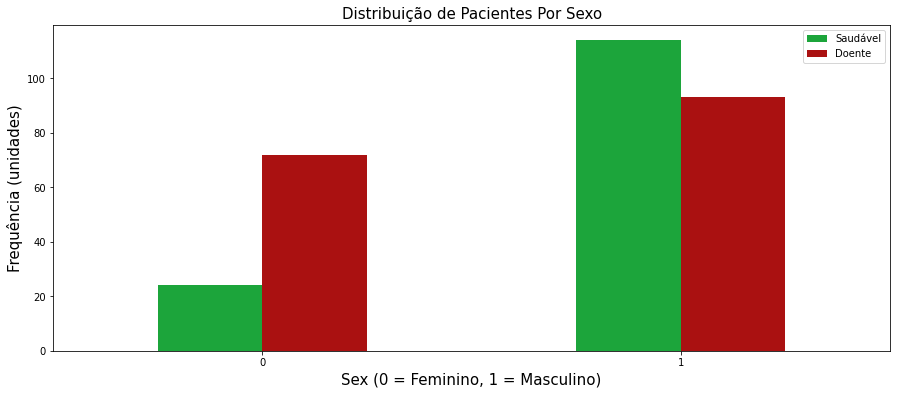

In [ ]:
print(df['sex'].value_counts())

print(f"\nPercentage of Male (1) and Female (0): \n{100*df['sex'].value_counts()/df.shape[0]}")

# Percentage of sicks by sex
perc_fem = df.copy()
perc_fem = df[df.sex == 0]
print(f"\nFemale Sicks: \n{100*perc_fem['output'].value_counts()/perc_fem.shape[0]}")

perc_mal = df.copy()
perc_mal = df[df.sex == 1]
print(f"\nMale Sicks: \n{100*perc_mal['output'].value_counts()/perc_mal.shape[0]}")

# Percentage os sicks - total
print("\nTotal of sicks and healthy patients per sex. \n 0 - Female \n 1 - Male")
perc_fem = df.copy()
perc_fem = df[df.output == 0]
print(f"\nHealthy \n{100*perc_fem['sex'].value_counts()/perc_fem.shape[0]}")

perc_mal = df.copy()
perc_mal = df[df.output == 1]
print(f"\nSicks \n{100*perc_mal['sex'].value_counts()/perc_mal.shape[0]}")

del perc_mal
del perc_fem


fonte = {'fontsize':15}
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Patients Distribution by Sex',fonte)
plt.xlabel('Sex (0 = Female, 1 = Male)',fonte)
plt.xticks(rotation=0)
plt.legend(["Health", "Sick"])
plt.ylabel('Frequency (units)',fonte)
plt.savefig('distr_sexos.png')
plt.show()


#### Age distribution




              age                                                      
            count       mean        std   min    25%   50%    75%   max
sex output                                                             
0   0        24.0  59.041667   4.964913  43.0  56.75  60.5  62.00  66.0
    1        72.0  54.555556  10.265337  34.0  46.00  54.0  63.25  76.0
1   0       114.0  56.087719   8.385155  35.0  51.00  57.5  61.00  77.0
    1        93.0  50.903226   8.682897  29.0  44.00  52.0  57.00  70.0 




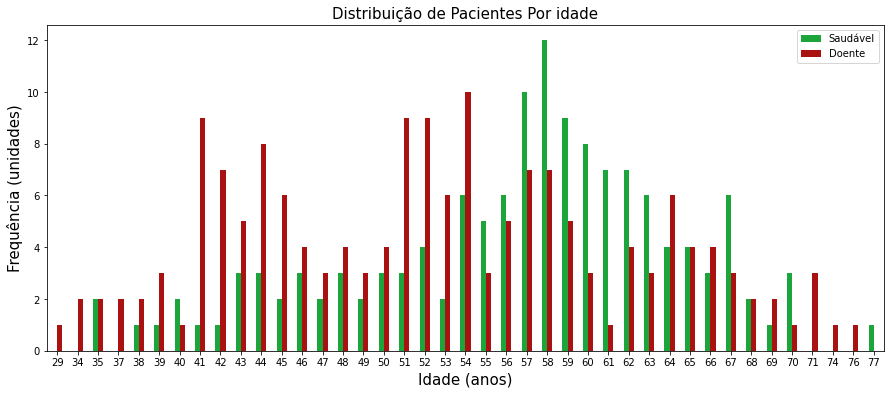

In [ ]:
fonte = {'fontsize':15}
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Patients Distribution by Age',fonte)
plt.xlabel('Age (years)',fonte)
plt.xticks(rotation=0)
plt.legend(["Health", "Sick"])
plt.ylabel('Frequency (units)',fonte)
plt.savefig('distr_age.png')
#plt.show()

# Grouping by age and sex
df_gb = df[['age','sex','output']].groupby(by=['sex','output']).describe()
print(df_gb,'\n\n')

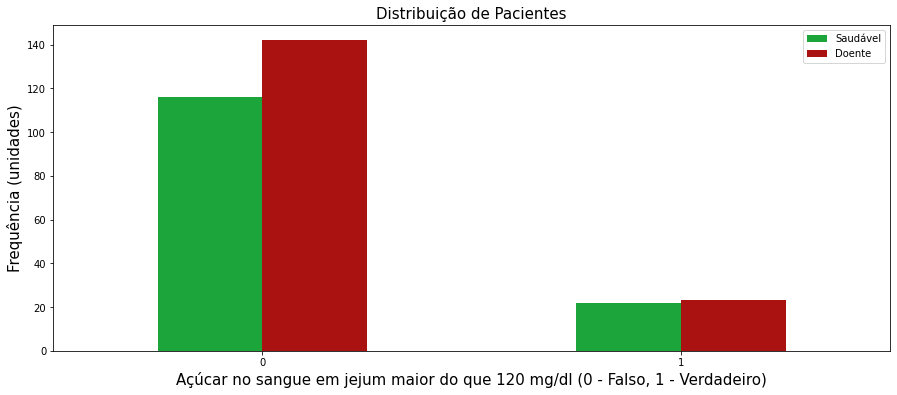

In [ ]:
# Glucose levels
fonte = {'fontsize':15}
pd.crosstab(df.fbs,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title(f'Patients Distibution',fonte)
plt.xlabel('Fasting blood sugar greater than 120 mg/dl (0 - False, 1 - True)',fonte)
plt.xticks(rotation=0)
plt.legend(["Healthy", "Sick"])
plt.ylabel('Frequency (units)',fonte)
plt.savefig('distr_sugar.png')
plt.show()

We can assert that there is no correlation between a pre-diabetes state and a heart attack.



---



#### Other distributions

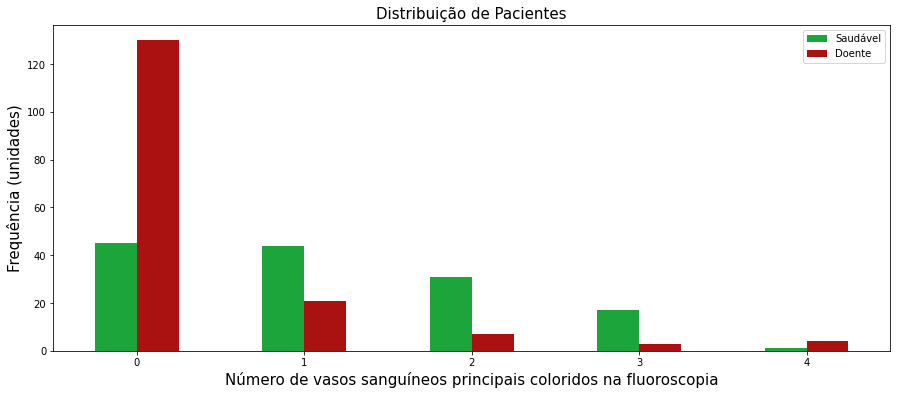

In [ ]:
# CAA 
fonte = {'fontsize':15}
pd.crosstab(df.caa,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title(f'Patients Distribution - Fluoroscopy Exam',fonte)
plt.xlabel('Number of main blood vessels colored in fluoroscopy',fonte)
plt.xticks(rotation=0)
plt.legend(["Healthy", "Sick"])
plt.ylabel('Frequency (units)',fonte)
plt.savefig('distr_fluor.png')
plt.show()



In [ ]:
# Healthy patients
aux1 = df.copy()
aux1 = aux1[aux1.output == 0]
print("\nHealthy")
print(aux1.describe())

# Sick patients
aux1 = df.copy()
aux1 = aux1[aux1.output == 1]
print("\nSick")
print(aux1.describe())



Healthy
              age         sex          cp      trtbps        chol         fbs  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean    56.601449    0.826087    0.478261  134.398551  251.086957    0.159420   
std      7.962082    0.380416    0.905920   18.729944   49.454614    0.367401   
min     35.000000    0.000000    0.000000  100.000000  131.000000    0.000000   
25%     52.000000    1.000000    0.000000  120.000000  217.250000    0.000000   
50%     58.000000    1.000000    0.000000  130.000000  249.000000    0.000000   
75%     62.000000    1.000000    0.000000  144.750000  283.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  409.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean     0.449275  139.101449    0.550725    1.585507    1.166667    1.166667   
std      0.541321 

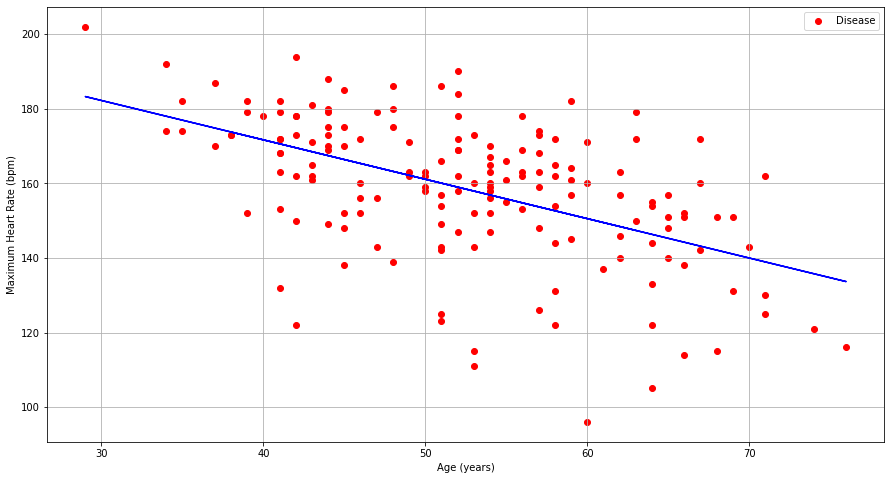

In [ ]:
# Max heart rate vs age
plt.figure(figsize=(15,8))
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="red")
#plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age (years)")
plt.ylabel("Maximum Heart Rate (bpm)")
plt.grid()

# Linear regression
age = df.age[df.output == 1].values
thal = df.thalachh[(df.output==1)].values

coef = np.polyfit(age,thal,1)
poly1d_fn = np.poly1d(coef)

thal_reg = poly1d_fn(age)

plt.plot(age,thal_reg,c="blue")

plt.show()

###### The graph shows a linear trend of decrease in the heart rate against the increase of the age

# Pre-processing

In [ ]:
# Separate training and test data
import random
from sklearn import preprocessing,model_selection

SEED = 10
random.seed(SEED)

# Training percentage
porcentagem_treino = 0.7


# Initial split - Nao estou usando o df_norm
saidas = df['output']
treino = df.drop(['output'],axis=1)

# Separating data
X_train, X_test, y_train, y_test = model_selection.train_test_split(treino,saidas,train_size=porcentagem_treino,random_state=SEED)

# Statistics
numero_train = dict(y_train.value_counts()) 

numero_test = dict(y_test.value_counts()) 

print(f"Training Data: {len(y_train)} \n{numero_train[0]} with output 0 - {round(100*numero_train[0]/(numero_train[0] + numero_train[1]),2)} %  \n{numero_train[1]} with output 1  - {round(100*numero_train[1]/(numero_train[0] + numero_train[1]),2)} %")
print(f"\n\nTest Data: {len(y_test)} \n{numero_test[0]} with output 0 -  {round(100*numero_test[0]/(numero_test[0] + numero_test[1]),2)} %  \n{numero_test[1]} with output 1 - {round(100*numero_test[1]/(numero_test[0] + numero_test[1]),2)} % \n")

for coluna in X_train.columns:
  valores = X_train[coluna].isnull().sum()
  print(coluna + " : " + str(valores))

Training Data: 212 
88 with output 0 - 41.51 %  
124 with output 1  - 58.49 %


Test Data: 91 
50 with output 0 -  54.95 %  
41 with output 1 - 45.05 % 

age : 0
sex : 0
cp : 0
trtbps : 0
chol : 0
fbs : 0
restecg : 0
thalachh : 0
exng : 0
oldpeak : 0
slp : 0
caa : 0
thall : 0


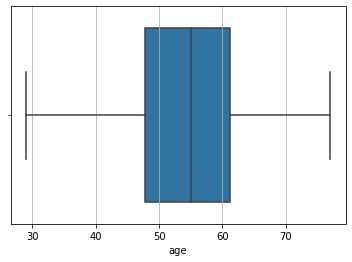

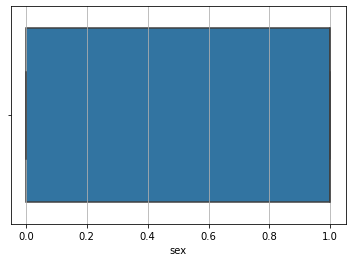

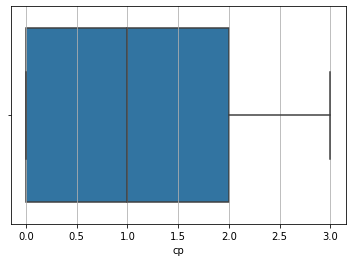

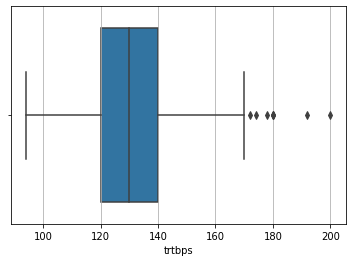

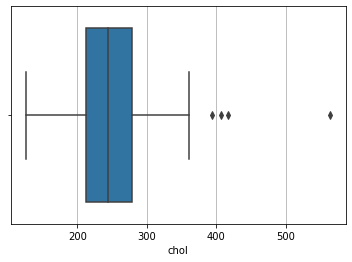

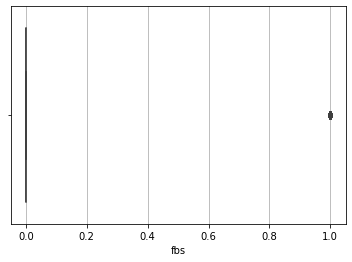

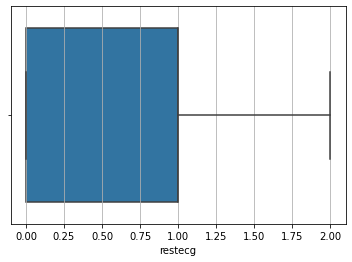

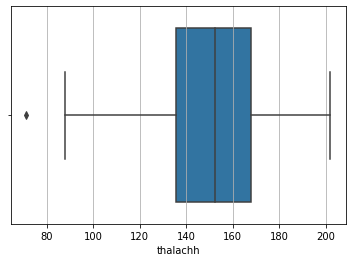

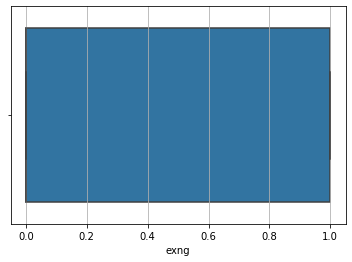

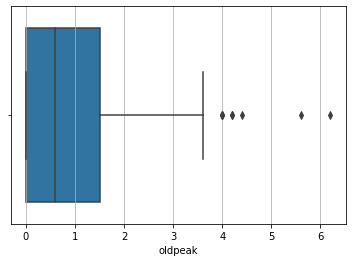

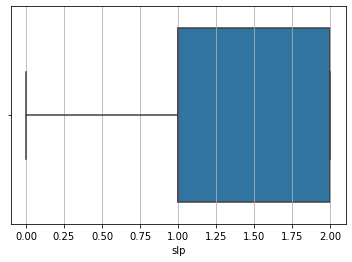

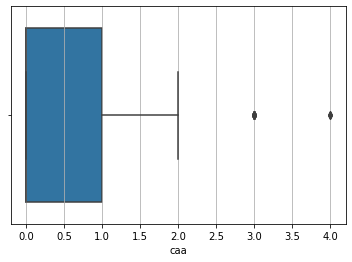

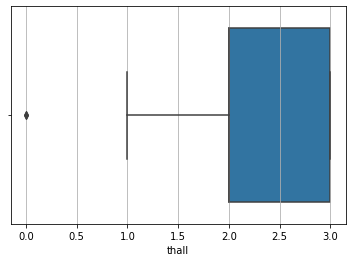

In [ ]:
# Finding the outliers - Boxplot
for colunas in X_train.columns:
  plt.figure()
  plt.grid()
  sns.boxplot(x=X_train[colunas])



In [ ]:
# Filtering the outliers
outliers_columns = ['oldpeak','chol','trtbps']
old_df = X_train.copy()
new_df = X_train.copy()
new_df['output'] = y_train
for col in outliers_columns:
  percentile25 = old_df[col].quantile(0.25)
  percentile75 = old_df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  new_df = new_df[new_df[col] < upper_limit]
  new_df[col] = new_df[col][new_df[col] > lower_limit]

y_train = new_df['output']
X_train = new_df.drop(['output'],axis=1)

print(f"Old dataframe: {old_df.shape}")
print(f'New dataframe: {new_df.shape}')


Old dataframe: (212, 13)
New dataframe: (193, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


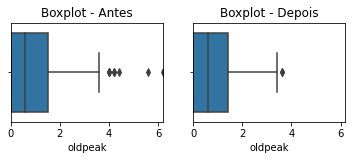

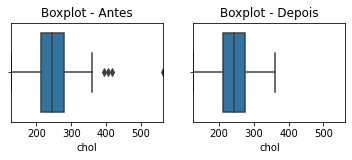

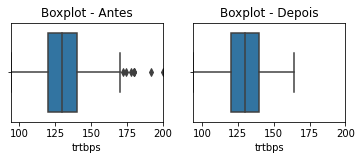

In [ ]:
outliers_columns
for colunas in outliers_columns:
  max_value = old_df[colunas].max()
  min_value = old_df[colunas].min()
  plt.figure()
  plt.grid()
  plt.subplot(2,2,1)
  sns.boxplot(x=old_df[colunas])
  plt.title("Boxplot - Before")
  plt.xlim([min_value,max_value])
  plt.subplot(2,2,2)
  sns.boxplot(x=new_df[colunas])
  plt.title("Boxplot - After")
  plt.xlim([min_value,max_value])
  plt.savefig(f"boxplot-{colunas}.png")

In [ ]:
# Normalize data
from sklearn import preprocessing,model_selection

# Select columns to Standardize
colunas_normalizadas = ['age','chol','trtbps','thalachh']
colunas = list(set(df.columns) - set(colunas_normalizadas)) 
colunas.remove('output')


# Use StandardScaler - Training data
aux = X_train[colunas_normalizadas]

mean = aux.mean()
std = aux.std()


scalar = preprocessing.StandardScaler()
df_norm = scalar.fit_transform(aux)

X_train_norm = X_train.copy()
df_norm = pd.DataFrame(df_norm,columns=colunas_normalizadas,index=X_train_norm.index)

X_train_norm.drop(columns=colunas_normalizadas,inplace=True)

for col in colunas_normalizadas:
  X_train_norm[col] = df_norm[col].copy()


# Normalization - Test data
aux = X_test.copy()
aux = aux[colunas_normalizadas]
aux2 = (aux - mean)/std

X_test_norm = X_test.copy()

for col in colunas_normalizadas:
  X_test_norm[col] = aux2[col].copy()

del aux2
del aux

# Ordering the columns
final_columns = list(df.columns)
final_columns.remove('output')

X_test_norm = X_test_norm[final_columns]
X_train_norm = X_train_norm[final_columns]

print('Train data: \n',X_test_norm.head())
print('\nTest data: \n',X_train_norm.head())


Train data: 
           age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  \
246  0.234450    0   0  0.381186  3.607943    0        0  0.006772     1   
183  0.447887    1   2 -1.095563 -0.318829    0        0  0.639186     0   
229  1.088200    1   2 -0.222938  1.414215    0        1 -0.794286     1   
126 -0.726020    1   0 -1.095563 -0.889198    0        1 -0.288355     0   
184 -0.405863    1   0  1.455186 -0.033645    0        0 -0.920769     0   

     oldpeak  slp  caa  thall  
246      1.9    1    2      3  
183      2.5    1    1      3  
229      1.8    1    0      3  
126      0.1    2    0      2  
184      2.6    1    0      3  

Test data: 
           age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  \
49  -0.085930    0   0  0.651376 -0.231681    0        0  0.429496     0   
171 -0.620911    1   1 -1.233012 -0.341653    0        1  0.767661     0   
58  -2.118860    1   3 -0.694615 -1.375386    0        0  1.021284     0   
154 -1.583879    0 

### PCA Analysis

In [ ]:
# For classification
from sklearn.decomposition import PCA

n_components = 11
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_train_norm)
print(f'Explanation ratio: {pca.explained_variance_ratio_} \nTotal: {sum(pca.explained_variance_ratio_)}')

col_names = []
for col in range(0,n_components):
  col_names.append('p' + str(col+1))


principal_components_df = pd.DataFrame(principal_components,columns=col_names)
principal_components_df['class'] = y_train.copy()



Explanation ratio: [0.26070355 0.14210616 0.13064093 0.09631366 0.08835586 0.0775896
 0.05778306 0.03973843 0.03128221 0.02667436 0.01998503] 
Total: 0.9711728463141546


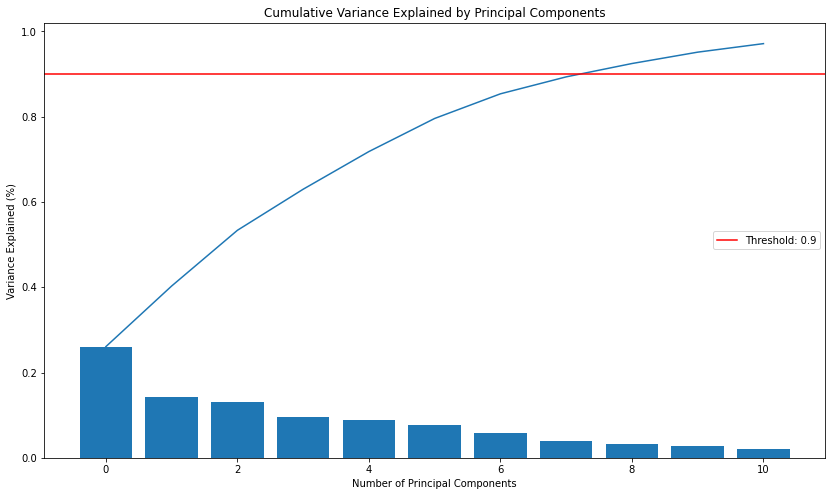

In [ ]:
def screeplot(pca,threshold):
    var_len = len(pca.explained_variance_ratio_)
    indx = np.arange(var_len)
    var_pca = pca.explained_variance_ratio_
    plt.figure(figsize=(14, 8))
    ax = plt.subplot()
    cum_var = np.cumsum(var_pca)
    ax.bar(indx, var_pca)
    ax.plot(indx, cum_var)
    ax.set_xlabel("Number of Principal Components")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Cumulative Variance Explained by Principal Components')
    plt.axhline(y=threshold, color='r', linestyle='-',label=f'Threshold: {threshold}')
    plt.legend(loc='center right')

# Ploting the graph
threshold = 0.9
screeplot(pca,threshold)

With only 7 features we have 90% of all information available on the dataset. Therefore, we can save computational power and have good results by not using all the 10 features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem p

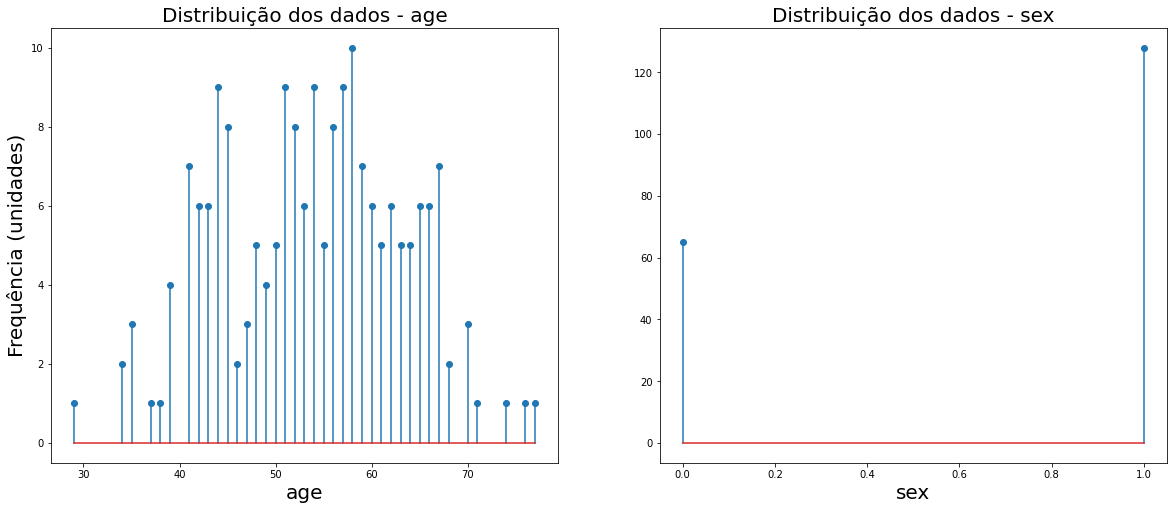

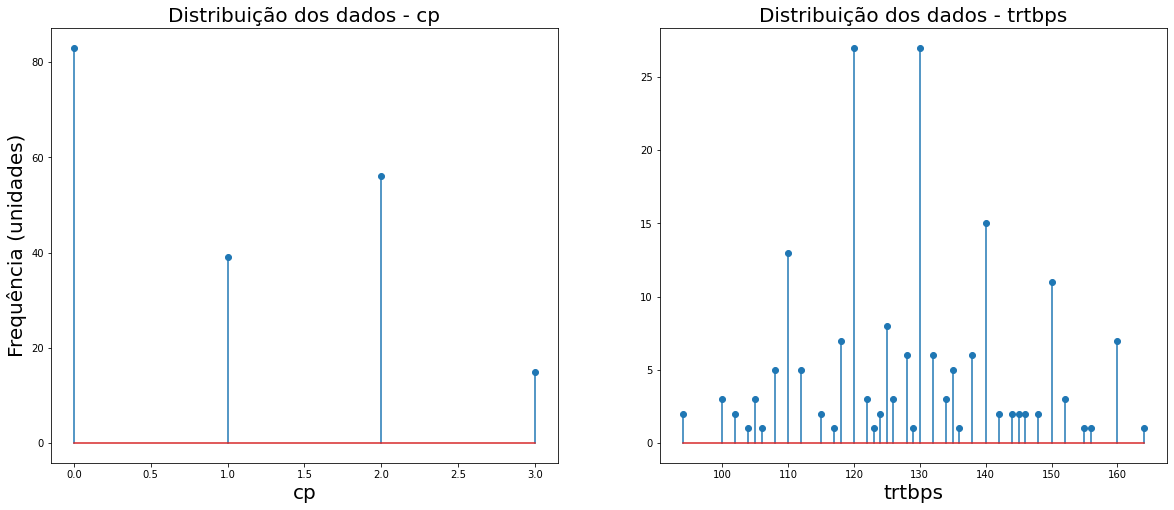

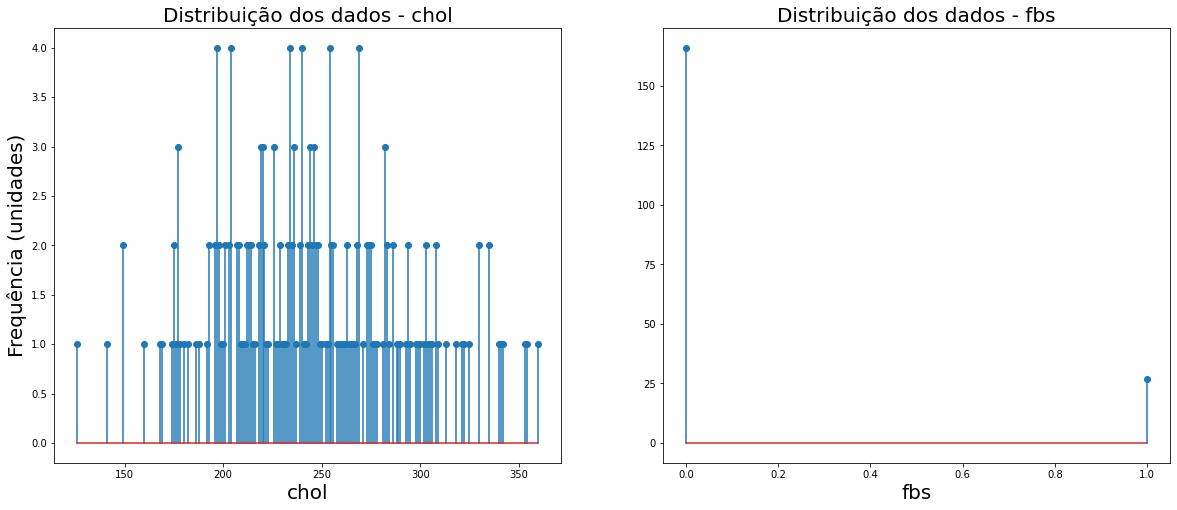

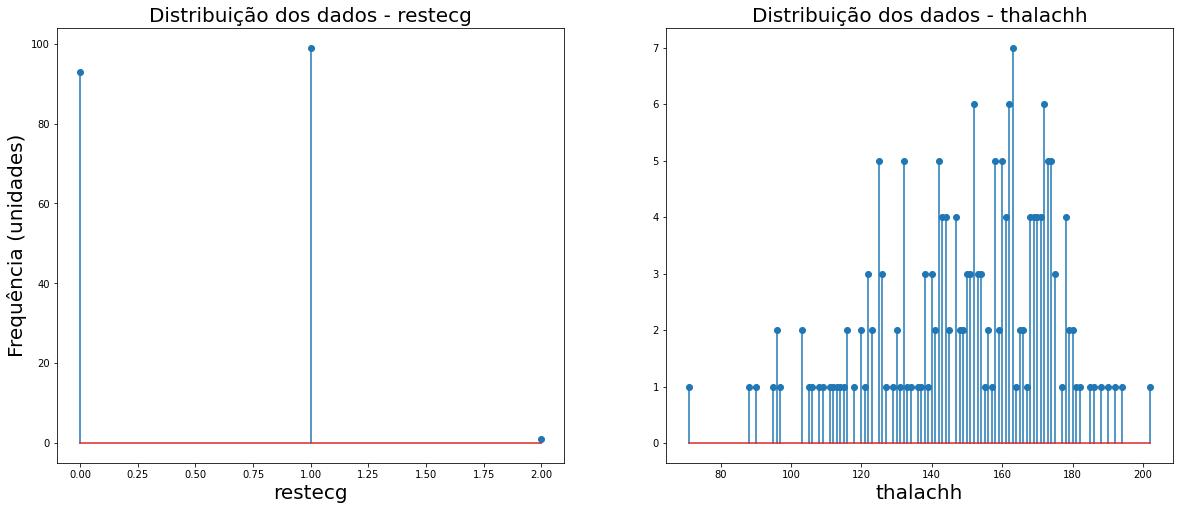

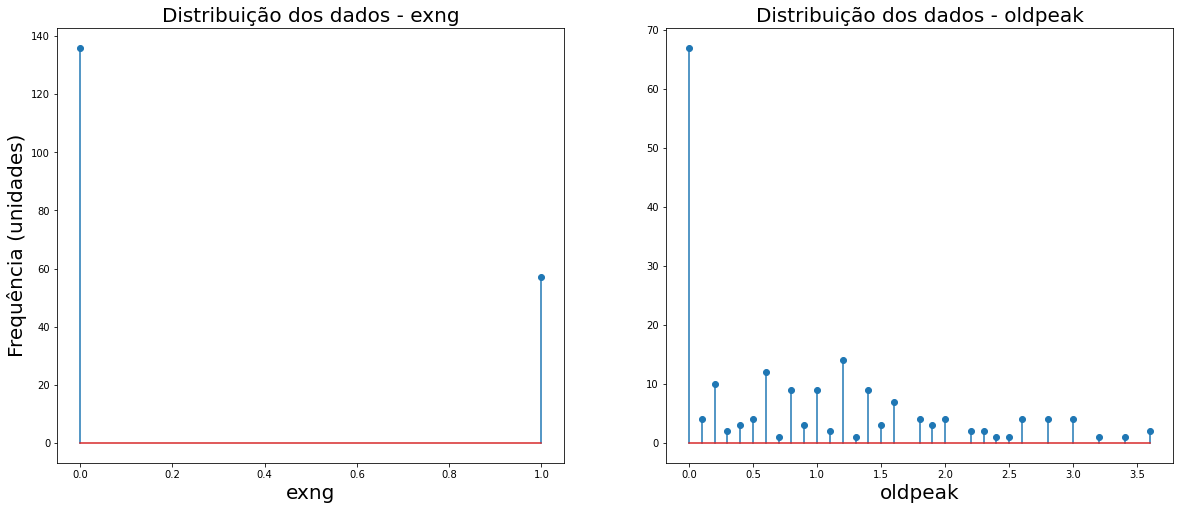

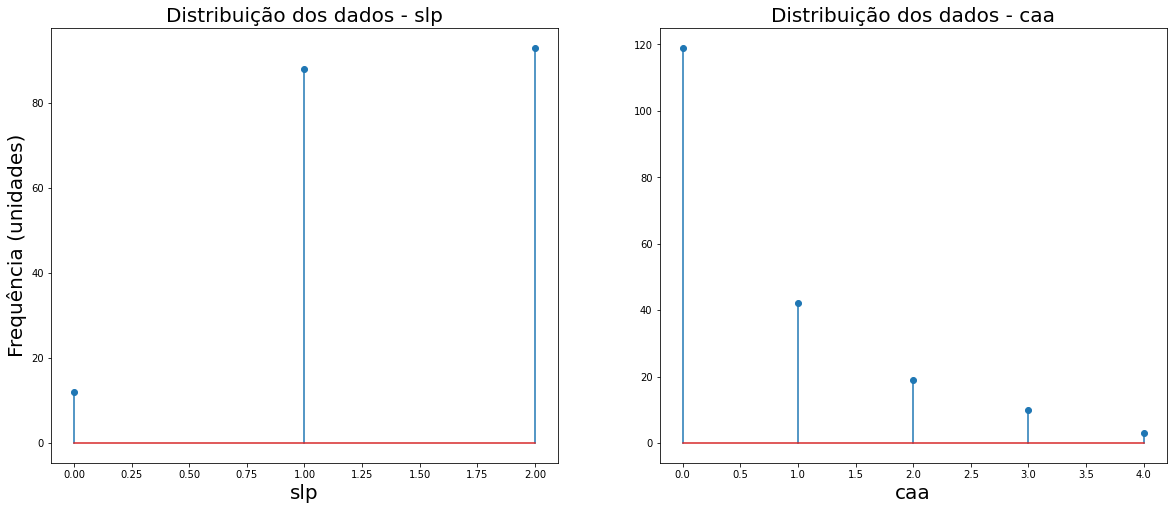

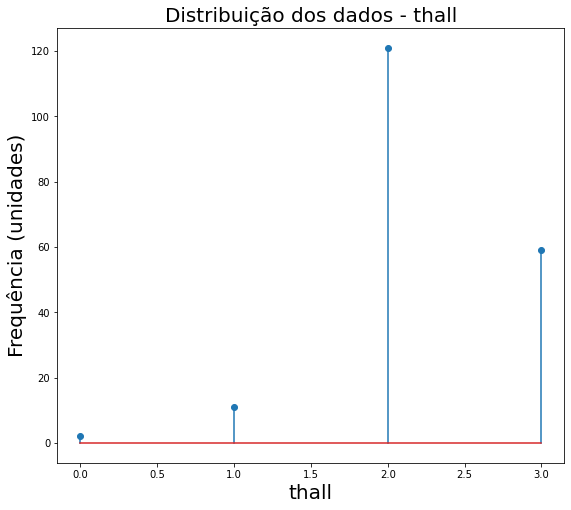

In [ ]:
# Removing constant values

contador = 1
linha = 1

for colunas in X_train.columns:
  
  # Column 1
  if contador == 1:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.ylabel("Frequency (units)",{'fontsize':20})
    plt.xlabel(colunas,{'fontsize':20})
    valores = X_train[colunas].value_counts()
    plt.title('Data Distribution - ' + colunas,{'fontsize':20})
    plt.stem(valores.index,valores.values)
  
  # Column 2
  if contador == 2:
    plt.subplot(1,2,2)
    plt.xlabel(colunas,{'fontsize':20})
    valores = X_train[colunas].value_counts()
    plt.title('Data Distribution - ' + colunas,{'fontsize':20})
    plt.stem(valores.index,valores.values)
    plt.savefig(f'data_distribution{linha}.png')
    linha += 1

  
  if contador == 1:
    aux = 2
  else:
    aux = 1



  contador = aux



### Finding outliers


In [ ]:
# Correlation Matrix

matriz_corr = X_train.corr()

matriz_corr.style.background_gradient(cmap='coolwarm')

# It was not possible to remove any feature because correlation between features is very low

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,0.010794,-0.121442,0.247895,0.184257,0.113978,-0.059943,-0.423599,0.123010,0.265149,-0.159083,0.274116,0.059474
sex,0.010794,1.000000,-0.151059,0.055986,-0.123051,0.129369,-0.128715,-0.053034,0.221019,0.135604,-0.085317,0.228757,0.218338
cp,-0.121442,-0.151059,1.000000,0.078318,-0.138799,0.067385,0.074388,0.266946,-0.401441,-0.169265,0.124024,-0.237987,-0.246665
trtbps,0.247895,0.055986,0.078318,1.000000,0.077614,0.134027,-0.083765,-0.086818,-0.033870,0.082713,-0.014384,0.047741,-0.030634
chol,0.184257,-0.123051,-0.138799,0.077614,1.000000,-0.005719,-0.196274,-0.014858,0.122300,0.034113,0.042794,0.121319,0.096116
fbs,0.113978,0.129369,0.067385,0.134027,-0.005719,1.000000,-0.033100,-0.054088,0.066334,0.091606,-0.131297,0.231685,-0.029083
restecg,-0.059943,-0.128715,0.074388,-0.083765,-0.196274,-0.033100,1.000000,0.013416,-0.152165,-0.057232,0.027005,-0.103944,0.068072
thalachh,-0.423599,-0.053034,0.266946,-0.086818,-0.014858,-0.054088,0.013416,1.000000,-0.320152,-0.394170,0.346289,-0.240785,-0.090396
exng,0.123010,0.221019,-0.401441,-0.033870,0.122300,0.066334,-0.152165,-0.320152,1.000000,0.236765,-0.185797,0.200191,0.210627
oldpeak,0.265149,0.135604,-0.169265,0.082713,0.034113,0.091606,-0.057232,-0.394170,0.236765,1.000000,-0.529371,0.147807,0.153122


# Algoritms Application


## Dummy classifier

Analyse how a dummy model perform to compare to other algorithms

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Accuracy: 0.451 



<Figure size 1080x1080 with 0 Axes>

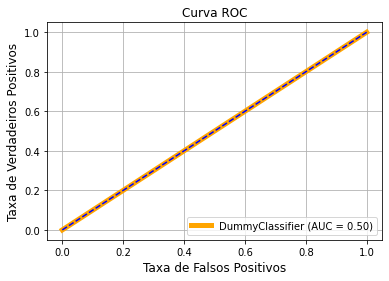

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, f1_score,classification_report, RocCurveDisplay

# Scores from all models wihtout any tuning
value_scores = {}

# Mean Squared error for all models
value_rmse = {}

# F1 Scores
value_f1 = {}

# Classification report
class_report = []

dummy = DummyClassifier()
dummy.fit(X_train_norm,y_train)

# Metrics
value_scores['Dummy'] = dummy.score(X_test_norm,y_test)
preds = dummy.predict(X_test_norm)
value_f1['Dummy'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))

print("Dummy Accuracy: %.3f \n" % value_scores['Dummy'])

# ROC Curve
# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(dummy,X_test,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_dummy.png')
plt.show()

## Random Forest


Random Forest Accuracy 0.791


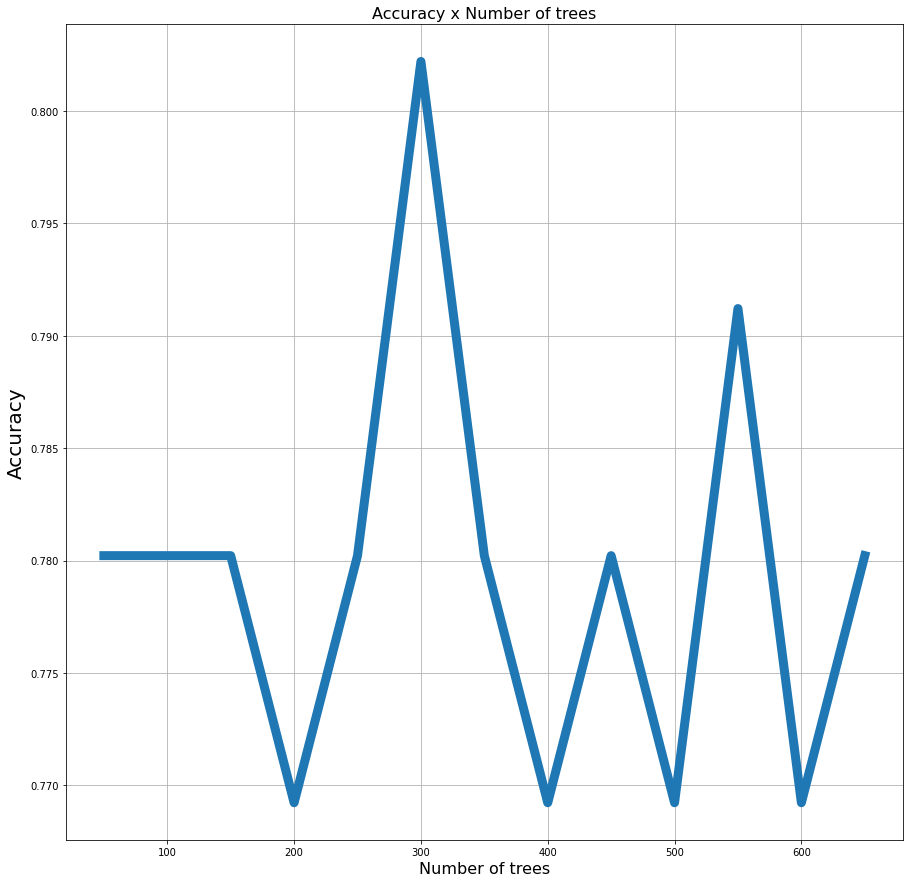

<Figure size 1080x1080 with 0 Axes>

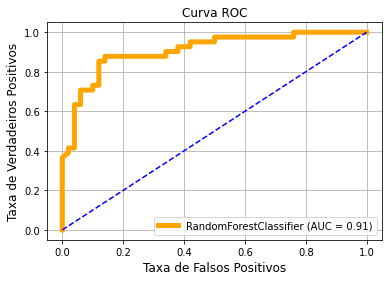

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt



SEED = 10
random.seed(SEED)

# Default configurations
random_forest = RandomForestClassifier(random_state=SEED)
random_forest.fit(X_train_norm,y_train)
random_forest_score = random_forest.score(X_test_norm,y_test)

value_scores['Random_forest'] = random_forest_score 
preds = random_forest.predict(X_test_norm)
value_f1['Random_forest'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))

print("Random Forest Accuracy %.3f" % random_forest_score)

# Varying the number of estimators (trees) - Every 50 from 50 to 500
number_trees = [*range(50,700,50)]

plt.figure(figsize=(15,15))

random_forest_score_list = []
for num_param in number_trees:
  random_forest = RandomForestClassifier(n_estimators=num_param)
  random_forest.fit(X_train_norm,y_train)
  random_forest_score_list.append(random_forest.score(X_test_norm,y_test))


plt.plot(number_trees,random_forest_score_list,linewidth=9)
plt.ylabel("Accuracy",fontsize=20)
plt.xlabel("Number of trees",fontsize=16)
plt.title("Accuracy x Number of trees",fontsize=16)
plt.grid()


# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(random_forest,X_test_norm,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_random_forest.png' )
plt.show()


## XGBoost




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:27:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBoost Accuracy: 0.802


<Figure size 1080x1080 with 0 Axes>

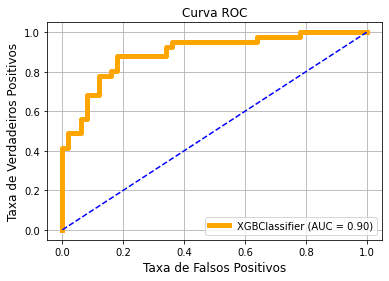

In [ ]:
! pip install xgboost

import xgboost as xgb

model = xgb.XGBClassifier()


model.fit(X_train_norm,y_train)
valor = model.score(X_test_norm,y_test)

value_scores['XGBoost'] = valor
preds = model.predict(X_test_norm)
value_f1['XGBoost'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))


print("\nXGBoost Accuracy: %.3f" % (valor))

# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(model,X_test_norm,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_xgboost.png' )
plt.show()

## Naive Bayes


Naive Bayes Accuracy 0.769


<Figure size 1080x1080 with 0 Axes>

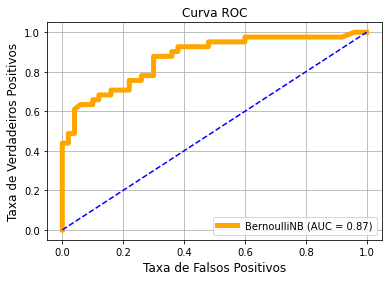

In [ ]:
from sklearn.naive_bayes import BernoulliNB


naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_norm,y_train)
naive_bayes_score = naive_bayes.score(X_test_norm,y_test)
value_scores['Naive_bayes'] = naive_bayes_score
preds = naive_bayes.predict(X_test_norm)
value_f1['Naive_bayes'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))

print("Naive Bayes Accuracy %.3f" % naive_bayes_score)

# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(naive_bayes,X_test_norm,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_naive_bayes.png' )
plt.show()

## Support Vector Machines

Support Vector Machines Accuracy 0.791


<Figure size 1080x1080 with 0 Axes>

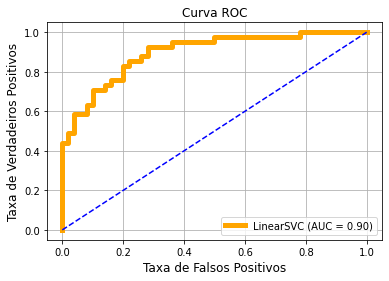

In [ ]:
from sklearn.svm import LinearSVC

svm1 = LinearSVC()
svm1.fit(X_train_norm,y_train)
svm1_score = svm1.score(X_test_norm,y_test)

value_scores['SVM'] = svm1_score
preds = svm1.predict(X_test_norm)
value_f1['SVM'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))

print("Support Vector Machines Accuracy %.3f" % svm1_score)

# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(svm1,X_test_norm,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_svm.png' )
plt.show()

## Logistic Regression

Logistic Regression Accuracy 0.791


<Figure size 1080x1080 with 0 Axes>

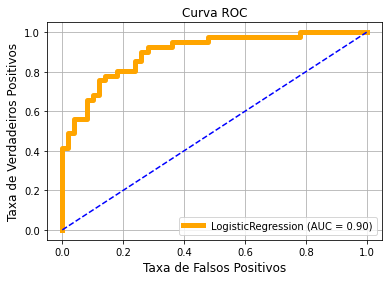

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()
log_regression.fit(X_train_norm,y_train)
log_regression_score = log_regression.score(X_test_norm,y_test)

value_scores['Logistic_regression'] = log_regression_score
preds = log_regression.predict(X_test_norm)
value_f1['Logistic_regression'] = f1_score(y_test,preds)
class_report.append(classification_report(y_test,preds))

print("Logistic Regression Accuracy %.3f" % log_regression_score)

# ROC Curve
plt.figure(figsize=(15,15))
RocCurveDisplay.from_estimator(log_regression,X_test_norm,y_test,linewidth=5,color='orange')
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.savefig('roc_logistic_reg.png' )
plt.show()

## Comparing all models

In [ ]:
print("Models Accuracy")

df_results = pd.DataFrame()
df_results['Model'] = value_scores.keys()
df_results['Accuracy'] = value_scores.values()
df_results['F1_Score'] = value_f1.values()
print(df_results)
names = list(value_scores.keys())

print('\n\n')

for index in range(0,len(class_report)):

  print(f"Model: {names[index]}")
  print(class_report[index])

Models Accuracy
                 Model  Accuracy  F1_Score
0                Dummy  0.450549  0.621212
1        Random_forest  0.791209  0.791209
2              XGBoost  0.802198  0.800000
3          Naive_bayes  0.769231  0.774194
4                  SVM  0.791209  0.800000
5  Logistic_regression  0.791209  0.800000



Model: Dummy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      1.00      0.62        41

    accuracy                           0.45        91
   macro avg       0.23      0.50      0.31        91
weighted avg       0.20      0.45      0.28        91

Model: Random_forest
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        50
           1       0.72      0.88      0.79        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79    

Without any fine tuning looks like that the Random Forest is the best model.

#### Best Model - Random Forest

The random forest algorithm presents the best Accuracy and AUC and also a very good F1 Score.


Now, it's time to show the feature importances in the decision making process of the Random Forest model.


Four most important features counts for 50.25 % of info for model decisions



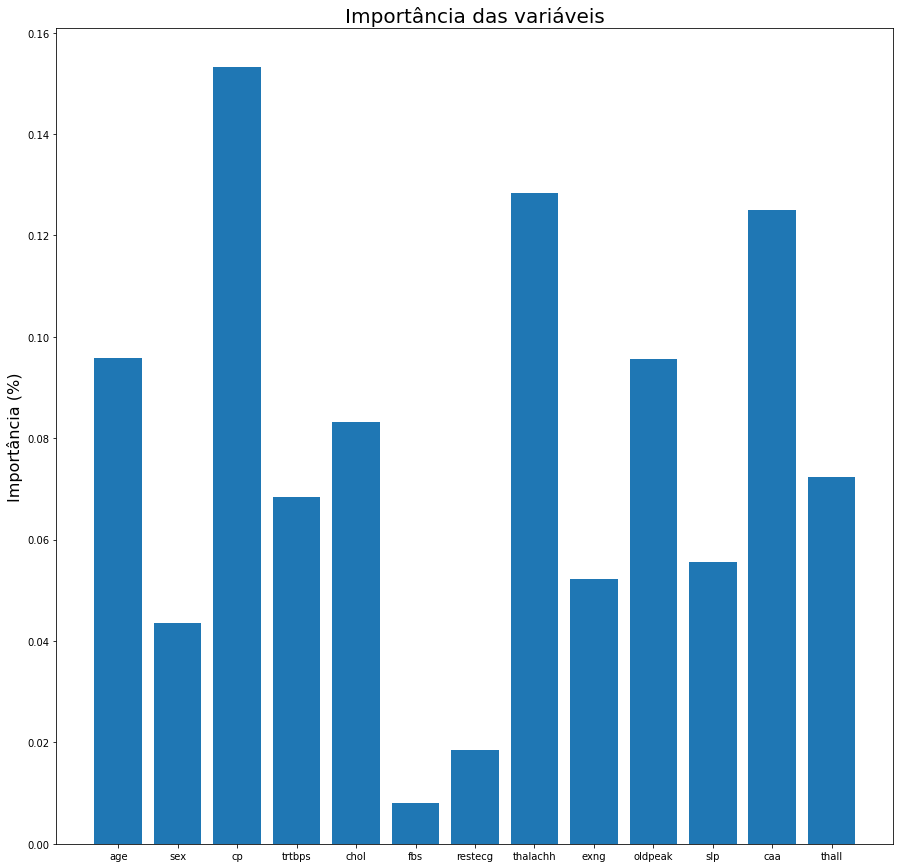

In [ ]:
importance = random_forest.feature_importances_
feature_names = random_forest.feature_names_in_

random_importance = pd.Series(importance,index=feature_names)
random_importance = random_importance.sort_values(ascending=False)


print(f'\nFour most important features counts for {round(100*sum(random_importance[0:4]),2)} % of info for model decisions\n')

# Plot most important features 
plt.figure(figsize=(15,15))
plt.bar(feature_names,importance)
plt.ylabel('Importance (%)',{'fontsize':16})
plt.title('Variables importance',{'fontsize':20})
plt.savefig('variables_importance.png')



#### Fine tuning



Fine tuning the best model (Random Forest) with cross-validation (KFold) and random grid search.

Hiperparameters:

- max_depth
- min_sample_split
- max_leaf_nodes
- min_samples_leaf
- n_estimators
- max_sample (bootstrap sample)
- max_features
 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 10
random.seed(SEED)

## Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Default configurations
rf = RandomForestClassifier(random_state=SEED)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=SEED, n_jobs = -1)
rf_random.fit(X_train_norm,y_train)

# Best parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
from sklearn import metrics

# Accuracy
rf_score = rf_random.score(X_test,y_test)
print(f"New Accuracy after fine tuning {round(rf_score,4)*100} %")

# F1 Score
preds = rf_random.predict(X_test)
print(f"New F1 Score after fine tuning {round(f1_score(y_test,preds),4)*100} % \n")


# ROC Curve
plt.figure(figsize=(15,15))

# Original model
pred_orig = random_forest.predict(X_test)
fpr_orig, tpr_orig, _ = metrics.roc_curve(y_test,pred_orig)
auc_orig = metrics.auc(fpr_orig,tpr_orig)


# Fine tuned model
pred_fine = rf_random.predict(X_test)
fpr_fine, tpr_fine, _ = metrics.roc_curve(y_test,pred_fine)
auc_fine = metrics.auc(fpr_fine,tpr_fine)

print("AUC ORIG:",auc_orig)
print("AUC FINE:",auc_fine)

# Fine tuned
curve_fine = RocCurveDisplay.from_estimator(rf_random,X_test,y_test,linewidth=5,color='green',label='Modelo Refinado').line_

# Original
curve_orig = RocCurveDisplay.from_estimator(random_forest,X_test,y_test,linewidth=5,color='orange',label='Modelo Original').line_

# Plot curve
plt.figure(figsize=(8,8))
plt.plot(curve_orig.get_xdata(),curve_orig.get_ydata(),label='Original', color='orange',linewidth=5)
plt.plot(curve_fine.get_xdata(),curve_fine.get_ydata(),label='Refinado',color='green',linewidth=5)
plt.grid()
aux = np.linspace(0,1,100)
plt.plot(aux,aux,'--',color='blue')
plt.title('ROC Curve',{'fontsize':12})
plt.ylabel('True Positive Rate',{'fontsize':12})
plt.xlabel('False Positive Rate',{'fontsize':12})
plt.legend(loc='center right')
plt.savefig('roc_rf_finetune.png' )
plt.show()


### Saving the model

In [ ]:
# Saving the model weights
import pickle

pkl_filename = "random_forest_refined.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_random, file)


### Using an AutoML framework instead


In [ ]:
!  pip install autogluon setuptools wheel  # autogluon==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Other preprocessing data


In [ ]:
# Removing some outliers by frequency
X_train_out = X_train.copy()
X_train_out['output'] = y_train.copy()

selected_columns = ['age','trtbps','chol','restecg','thalachh','oldpeak','caa','thall']

for x in X_test.columns:
    q75,q25 = np.percentile(X_train_out.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X_train_out.loc[X_train_out[x] < min,x] = np.nan
    X_train_out.loc[X_train_out[x] > max,x] = np.nan

print(X_train_out.isnull().sum())

X_train_out = X_train_out.dropna(axis=0)

print(X_train_out.shape)


age          0
sex          0
cp           0
trtbps       0
chol         0
fbs         27
restecg      0
thalachh     1
exng         0
oldpeak      2
slp          0
caa         13
thall        2
output       0
dtype: int64
(154, 14)


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

automl_train_data = X_train_out
automl_train_data['output'] = y_train

automl_test_data = X_test
automl_test_data['output'] = y_test


train_data = TabularDataset(automl_train_data)
test_data = TabularDataset(automl_test_data)

# Accuracy
print("\nAccuracy")
predictor = TabularPredictor(label='output',eval_metric='accuracy').fit(train_data, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(test_data)


# F1 Score
print("\nF1 Score")
predictor = TabularPredictor(label='output',eval_metric='f1').fit(train_data, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(test_data)

# ROC AUC
print("\nROC AUC")
predictor = TabularPredictor(label='output',eval_metric='roc_auc').fit(train_data, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(test_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20220613_023133/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220613_023133/"
AutoGluon Version:  0.4.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    154
Train Data Columns: 13
Label Column: output
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11751.47 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data 


Accuracy


	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Useless Original Features (Count: 1): ['fbs']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 12 | ['age', 'sex', 'cp', 'trtbps', 'chol', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 10 | ['age', 'cp', 'trtbps', 'chol', 'restecg', ...]
		('int', ['bool']) :  2 | ['sex', 'exng']
	0.2s = Fit runtime
	12 features in original data used to generate 12 features in processed data.
	Train Data (Processed) Memory Usage: 0.01 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.3s ...
AutoGluon will gauge predictive performance using evaluation metric: 'ac

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost    0.857143   0.806452        0.014373       0.008950  0.783450                 0.014373                0.008950           0.783450            1       True          7
1        ExtraTreesGini    0.846154   0.838710        0.121577       0.217673  1.122105                 0.121577                0.217673           1.122105            1       True          8
2              LightGBM    0.835165   0.838710        0.005009       0.004917  0.480465                 0.005009                0.004917           0.480465            1       True          4
3               XGBoost    0.835165   0.806452        0.010848       0.043069  0.301879                 0.010848                0.043069           0.301879            1       True         11
4        NeuralNetTorch    0.835165   0.83871

	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Useless Original Features (Count: 1): ['fbs']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 12 | ['age', 'sex', 'cp', 'trtbps', 'chol', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 10 | ['age', 'cp', 'trtbps', 'chol', 'restecg', ...]
		('int', ['bool']) :  2 | ['sex', 'exng']
	0.2s = Fit runtime
	12 features in original data used to generate 12 features in processed data.
	Train Data (Processed) Memory Usage: 0.01 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.29s ...
AutoGluon will

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        ExtraTreesGini    0.847826   0.883721        0.114562       0.106072  0.730364                 0.114562                0.106072           0.730364            1       True          8
1              LightGBM    0.838710   0.883721        0.006585       0.005860  1.117424                 0.006585                0.005860           1.117424            1       True          4
2      RandomForestEntr    0.838710   0.863636        0.113428       0.105036  1.177699                 0.113428                0.105036           1.177699            1       True          6
3      RandomForestGini    0.838710   0.863636        0.114152       0.105808  0.961214                 0.114152                0.105808           0.961214            1       True          5
4        ExtraTreesEntr    0.835165   0.86363

		('float', []) : 12 | ['age', 'sex', 'cp', 'trtbps', 'chol', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 10 | ['age', 'cp', 'trtbps', 'chol', 'restecg', ...]
		('int', ['bool']) :  2 | ['sex', 'exng']
	0.1s = Fit runtime
	12 features in original data used to generate 12 features in processed data.
	Train Data (Processed) Memory Usage: 0.01 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.19s ...
AutoGluon will gauge predictive performance using evaluation metric: 'roc_auc'
	This metric expects predicted probabilities rather than predicted class labels, so you'll need to use predict_proba() instead of predict()
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 123, Val Rows: 31
Fitting 13 L1 models ...
Fitting model: KNeighborsUnif ... Training model for up to 119.81s of the 119.8s of remaining time.
	0.6

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost    0.939512   0.854545        0.008219       0.011412  0.123185                 0.008219                0.011412           0.123185            1       True         11
1        ExtraTreesGini    0.938293   0.895455        0.118159       0.104898  0.733433                 0.118159                0.104898           0.733433            1       True          8
2         LightGBMLarge    0.938293   0.854545        0.006363       0.006333  0.292340                 0.006363                0.006333           0.292340            1       True         13
3      RandomForestGini    0.937805   0.895455        0.115340       0.104777  0.746526                 0.115340                0.104777           0.746526            1       True          5
4        ExtraTreesEntr    0.935122   0.87272